In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [122]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_valid_path = "Fruits_Vegetables/validation"

In [123]:
img_width = 180
img_height = 180

In [124]:
batch_size = 32
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = batch_size,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [125]:
data_cat = data_train.class_names
print(data_cat)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [126]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_valid_path,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False,
    validation_split = False)


Found 351 files belonging to 36 classes.


In [127]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    shuffle = False,
    validation_split = False)

Found 359 files belonging to 36 classes.


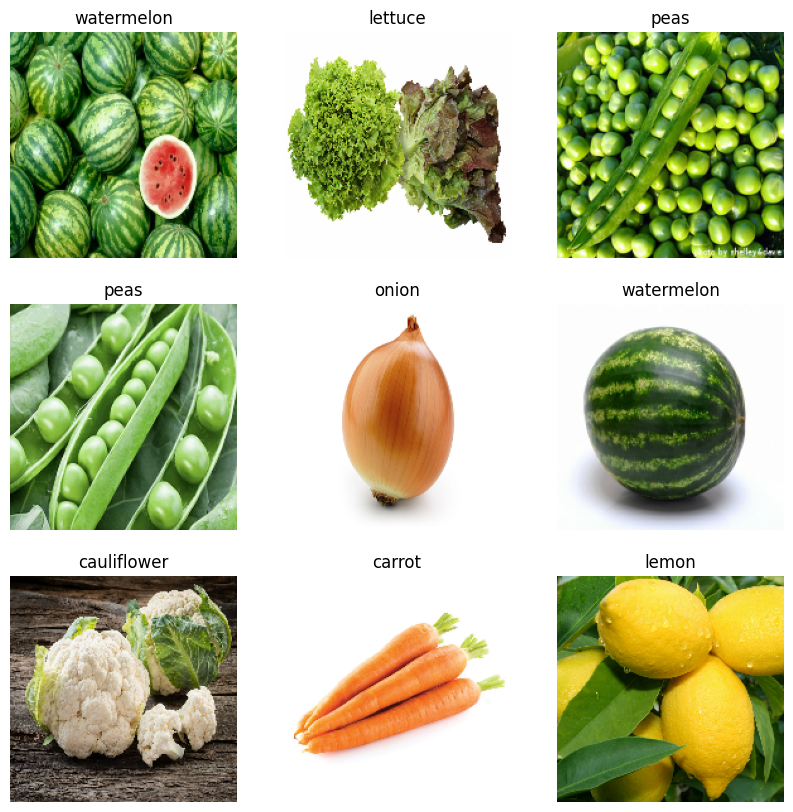

In [128]:
plt.figure(figsize = (10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [129]:
model = Sequential([
    layers.Rescaling(1./255), 
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [130]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [131]:
epochs = 25
history = model.fit(data_train, validation_data = data_val, epochs = epochs, batch_size = batch_size, verbose = 1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 235ms/step - accuracy: 0.0717 - loss: 3.8520 - val_accuracy: 0.2963 - val_loss: 2.5009
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 236ms/step - accuracy: 0.2727 - loss: 2.4626 - val_accuracy: 0.5128 - val_loss: 1.8174
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.4492 - loss: 1.9343 - val_accuracy: 0.7208 - val_loss: 1.0798
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.6117 - loss: 1.3783 - val_accuracy: 0.8234 - val_loss: 0.6982
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.7654 - loss: 0.8257 - val_accuracy: 0.8974 - val_loss: 0.4199
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step - accuracy: 0.8606 - loss: 0.4828 - val_accuracy: 0.9174 - val_loss: 0.4270
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 246ms/step - accuracy: 0.9056 - loss: 0.3337 - val_accuracy: 0.9288 - val_loss: 0.4229
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.9406 - loss: 0.2331 - val_accu

Text(0.5, 1.0, 'Loss')

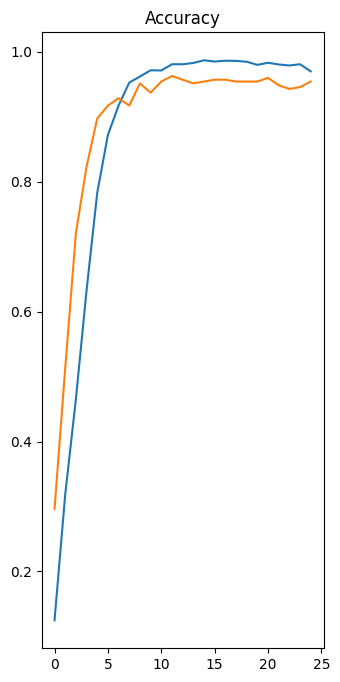

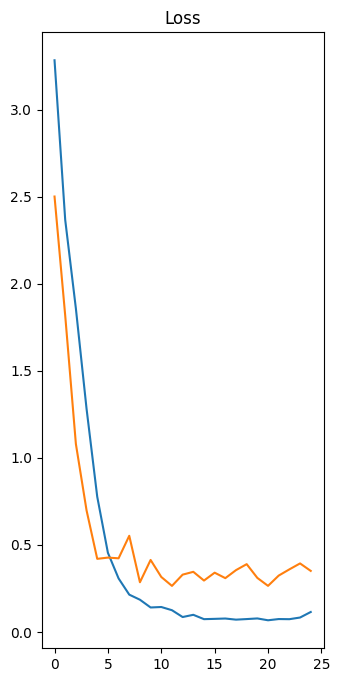

In [132]:
epochs_range = range(epochs)
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history ['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history ['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history ['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history ['val_loss'], label = 'Validation Loss')
plt.title('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


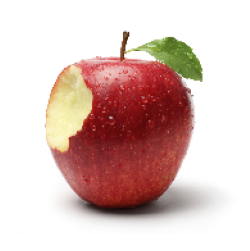

Veg/Fruit in image is apple with accuracy of 99.21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


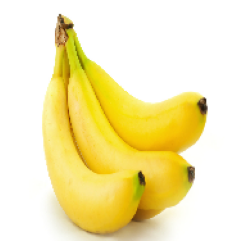

Veg/Fruit in image is banana with accuracy of 99.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


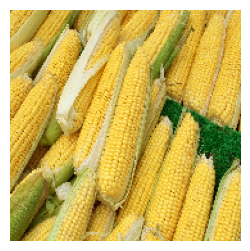

Veg/Fruit in image is corn with accuracy of 98.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


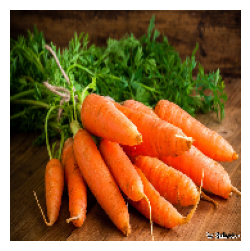

Veg/Fruit in image is carrot with accuracy of 100.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


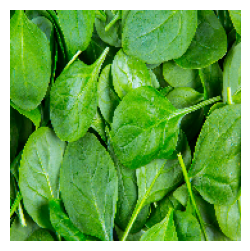

Veg/Fruit in image is spinach with accuracy of 100.00


In [159]:
images = ['apple.jpg', 'banana.jpg', 'corn.jpg', 'carrot.jpg', 'spinach.jpg']
for image in images:
    image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
    img_arr = tf.keras.utils.array_to_img(image)
    img_bat = tf.expand_dims(img_arr, 0)
    predict = model.predict(img_bat)
    score = tf.nn.softmax(predict)
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')  # Hide axes for a cleaner display
    plt.show()
    print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

In [139]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [140]:
score = tf.nn.softmax(predict)

In [141]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is banana with accuracy of 99.97


In [158]:
model.save('Image_classify.keras')